In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-cost-of-living-dataset-3171-counties/cost_of_living_us.csv


In [14]:
living_cost = pd.read_csv('/kaggle/input/us-cost-of-living-dataset-3171-counties/cost_of_living_us.csv')

In [15]:
living_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [16]:
living_cost.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


family_member_count column contains both the parent count and the children count. Going to separate these into different columns.

In [21]:
living_cost['Parents'] = living_cost['family_member_count'].apply(lambda a: int(re.search(r'([\d+])p\d+c',a).group(1)))

In [22]:
living_cost['Parents'].head()

0    1
1    1
2    1
3    1
4    1
Name: Parents, dtype: int64

In [23]:
living_cost['Children'] = living_cost['family_member_count'].apply(lambda a: int(re.search(r'\d+p(\d+)c',a).group(1)) )

In [24]:
living_cost['Children'].head() 

0    0
1    1
2    2
3    3
4    4
Name: Children, dtype: int64

Successfully created two new columns for parents and children.

grouping numerical data-types to allow for correlation calculations.

In [17]:
living_cost_num = living_cost.select_dtypes(exclude=['object','bool'])

In [18]:
living_cost_num.head()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [19]:
living_cost_num.columns = ['case_id','hous_cost','food_cost','transp_cost','healthcare_cost','others_cost','childcare_cost','taxes','tot_cost','median_fam_income']

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'case_id'),
  Text(1.5, 0, 'hous_cost'),
  Text(2.5, 0, 'food_cost'),
  Text(3.5, 0, 'transp_cost'),
  Text(4.5, 0, 'healthcare_cost'),
  Text(5.5, 0, 'others_cost'),
  Text(6.5, 0, 'childcare_cost'),
  Text(7.5, 0, 'taxes'),
  Text(8.5, 0, 'tot_cost'),
  Text(9.5, 0, 'median_fam_income')])

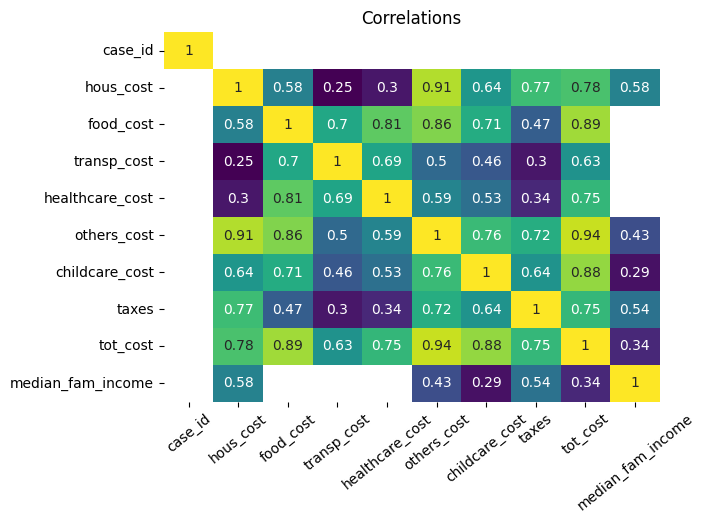

In [20]:
sns.heatmap(living_cost_num.corr()[living_cost_num.corr()>0.2],cmap='viridis',cbar=False, annot=True)
plt.title('Correlations')
plt.xticks(rotation=39)

The closer the value is to 1, the higher the correlation.

Text(0.5, 1.0, 'Missing values')

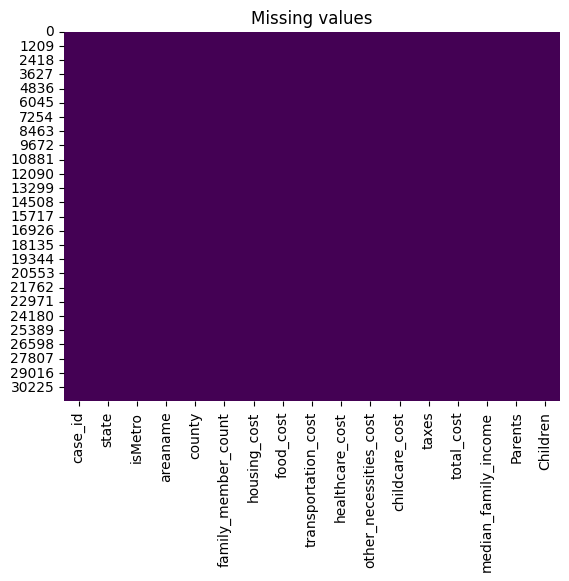

In [25]:
sns.heatmap(living_cost.isnull(),cmap='viridis',cbar=False)
plt.title('Missing values')

There aren't a significant number of missing values.

In [26]:
living_cost.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
Parents                    0
Children                   0
dtype: int64

Confirming that there are only 10 missing values and one column.

Text(0.5, 1.0, 'Parents')

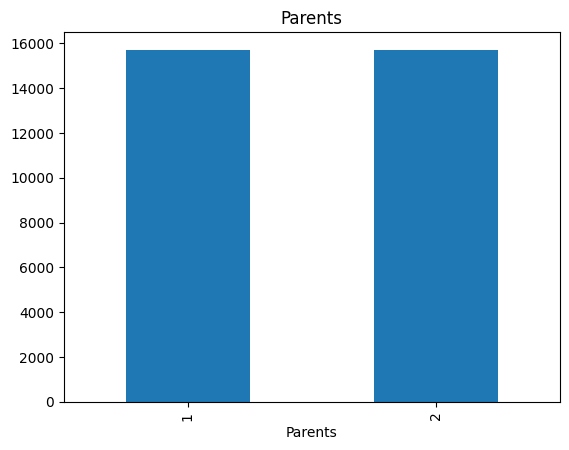

In [27]:
living_cost['Parents'].value_counts().plot.bar()
plt.title('Parents')

Text(0.5, 1.0, 'Children')

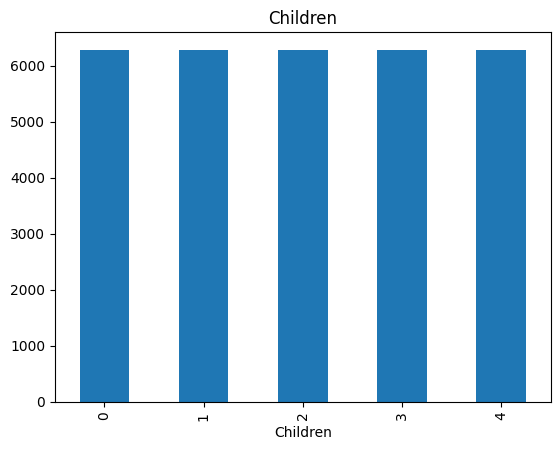

In [28]:
living_cost['Children'].value_counts().plot.bar()
plt.title('Children')

In [29]:
living_cost.shape

(31430, 17)

There are 31430 rows of data.

In [30]:
living_cost.columns

Index(['case_id', 'state', 'isMetro', 'areaname', 'county',
       'family_member_count', 'housing_cost', 'food_cost',
       'transportation_cost', 'healthcare_cost', 'other_necessities_cost',
       'childcare_cost', 'taxes', 'total_cost', 'median_family_income',
       'Parents', 'Children'],
      dtype='object')

<Axes: ylabel='state'>

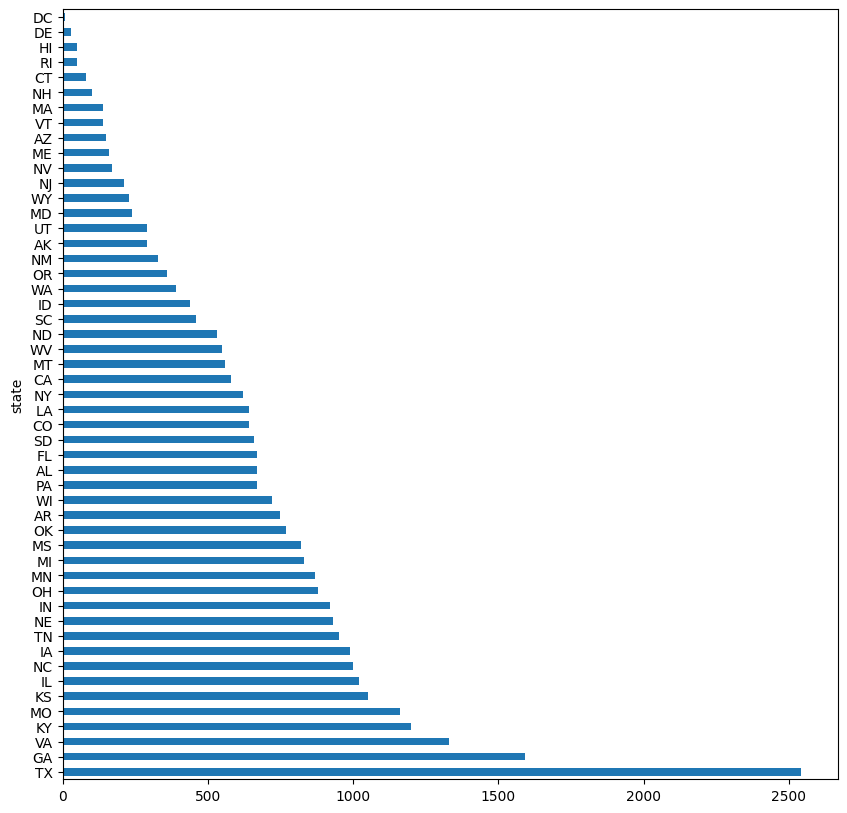

In [31]:
plt.figure(figsize=(10,10))
living_cost['state'].value_counts().plot.barh()

In [32]:
living_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

Texas has the most representation in the dataset

In [33]:
living_cost.groupby('state')[['taxes', 'total_cost', 'median_family_income',
       'Parents', 'Children']].sum().sort_values('total_cost',ascending=False).head(5)

,taxes,total_cost,median_family_income,Parents,Children
state,,,,,
TX,1.195981e+07,1.645803e+08,1.677677e+08,3810,5080
GA,1.065467e+07,1.031884e+08,9.514772e+07,2385,3180
VA,1.311031e+07,1.020756e+08,1.021842e+08,1995,2660
KY,8.741827e+06,7.835307e+07,6.977316e+07,1800,2400
MO,7.941156e+06,7.681608e+07,7.080530e+07,1740,2320


In [34]:
living_cost.groupby('state')['Parents'].sum().sort_values(ascending=False)

state
TX    3810
GA    2385
VA    1995
KY    1800
MO    1740
KS    1575
IL    1530
NC    1500
IA    1485
TN    1425
NE    1395
IN    1380
OH    1320
MN    1305
MI    1245
MS    1230
OK    1155
AR    1125
WI    1080
FL    1005
AL    1005
PA    1005
SD     990
LA     960
CO     960
NY     930
CA     870
MT     840
WV     825
ND     795
SC     690
ID     660
WA     585
OR     540
NM     495
UT     435
AK     435
MD     360
WY     345
NJ     315
NV     255
ME     240
AZ     225
MA     210
VT     210
NH     150
CT     120
RI      75
HI      75
DE      45
DC      15
Name: Parents, dtype: int64

TX, GA and VA are top three when sorted by 'total_cost' and they also seem to have top numbers of parents and children.



(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

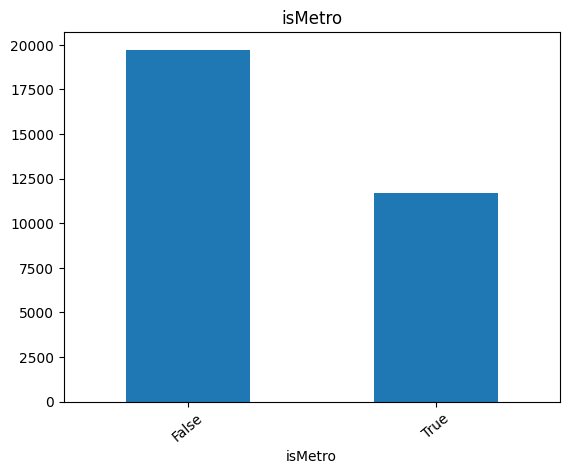

In [35]:
living_cost['isMetro'].value_counts().plot.bar()
plt.title('isMetro')
plt.xticks(rotation=40)

Fewer metro states.

In [36]:
living_cost[living_cost['isMetro']==True]['total_cost'].mean()

76489.60242697436

In [37]:
living_cost[living_cost['isMetro']==False]['total_cost'].mean()

67588.01658367967

metro locations have a higher average of total_cost; cost of living.

In [40]:
living_cost['areaname'].value_counts()

areaname
Atlanta-Sandy Springs-Roswell, GA HUD Metro FMR Area             240
Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area     200
Richmond, VA MSA                                                 170
Virginia Beach-Norfolk-Newport News, VA-NC HUD Metro FMR Area    150
St. Louis, MO-IL HUD Metro FMR Area                              140
                                                                ... 
Monroe County, KY                                                 10
Montgomery County, KY                                             10
Morgan County, KY                                                 10
Muhlenberg County, KY                                             10
Weston County, WY                                                 10
Name: count, Length: 2561, dtype: int64

In [41]:
living_cost['county'].value_counts()

county
Washington County        300
Jefferson County         250
Franklin County          240
Lincoln County           230
Jackson County           230
                        ... 
Aroostook County          10
Androscoggin County       10
Winn Parish               10
West Feliciana Parish     10
Weston County             10
Name: count, Length: 1877, dtype: int64

In [42]:
living_cost.groupby('areaname')['total_cost'].sum().sort_values(ascending=False)

areaname
Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area     1.997805e+07
Atlanta-Sandy Springs-Roswell, GA HUD Metro FMR Area             1.813432e+07
Richmond, VA MSA                                                 1.377080e+07
Virginia Beach-Norfolk-Newport News, VA-NC HUD Metro FMR Area    1.251555e+07
Minneapolis-St. Paul-Bloomington, MN-WI HUD Metro FMR Area       1.190751e+07
                                                                     ...     
Allendale County, SC                                             5.554485e+05
Clarendon County, SC                                             5.538816e+05
Starr County, TX                                                 5.516838e+05
Barnwell County, SC                                              5.504987e+05
Orangeburg County, SC                                            5.443102e+05
Name: total_cost, Length: 2561, dtype: float64

The area that costs the most to live in is Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area

In [43]:
living_cost.groupby('county')['total_cost'].sum().sort_values(ascending=False)

county
Washington County    2.151461e+07
Jefferson County     1.796621e+07
Franklin County      1.667036e+07
Lincoln County       1.621125e+07
Jackson County       1.576148e+07
                         ...     
Allendale County     5.554485e+05
Clarendon County     5.538816e+05
Starr County         5.516838e+05
Barnwell County      5.504987e+05
Orangeburg County    5.443102e+05
Name: total_cost, Length: 1877, dtype: float64

The county that costs the most live in is Washington County.